In [20]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [144]:
def import_merge():
    df_covid=pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv')
    df_risk=pd.read_csv('https://raw.githubusercontent.com/sli525/rmds-lab-team3-project/master/output%20file/risk_level.csv')
    df_merge=df_risk.merge(df_covid,left_on=['Timestamp','Region'],right_on=['date','place'],how='left')
    df_merge.drop([ 'date', 'county','fips','place','note'],axis=1,inplace=True)
    df_merge['Timestamp']=pd.to_datetime(df_merge['Timestamp'])
    return(df_merge)

In [145]:
df_merge=import_merge()

In [128]:
def Data_processing(df_merge, rolling_len):
    Region_ls=df_merge['Region'].unique()
    for region in Region_ls:
        df_merge.loc[df_merge['Region']==region,'New Cases']=df_merge.loc[df_merge['Region']==region,'confirmed_cases'].diff()
        df_merge.loc[df_merge['Region']==region,'Risk Score Rolling Avg']=df_merge[df_merge['Region']==region]['Risk Score'].rolling(rolling_len, min_periods=1).mean()
        df_merge.loc[df_merge['Region']==region,'New Cases Rolling Avg']=df_merge[df_merge['Region']==region]['New Cases'].rolling(rolling_len, min_periods=1).mean()
        df_merge.loc[df_merge['Region']==region,'Risk Score Rolling Diff']=df_merge.loc[df_merge['Region']==region,'Risk Score Rolling Avg'].diff()
        df_merge.loc[df_merge['Region']==region,'New Cases Rolling Diff']=df_merge.loc[df_merge['Region']==region,'New Cases Rolling Avg'].diff()        
    return df_merge

In [129]:
df=Data_processing(df_merge,18)
df.head(3)

,Timestamp,Region,Risk Score,Risk Level,confirmed_cases,x,y,New Cases,Risk Score Rolling Avg,New Cases Rolling Avg,Risk Score Rolling Diff,New Cases Rolling Diff
0,2020-04-01,Agoura Hills,-1.742944,0,10.0,-118.760876,34.151007,NaN,-1.742944,NaN,NaN,NaN
1,2020-04-01,Alhambra,0.373722,1,13.0,-118.135504,34.083961,NaN,0.373722,NaN,NaN,NaN
2,2020-04-01,Altadena,-0.417035,0,14.0,-118.135675,34.193482,NaN,-0.417035,NaN,NaN,NaN


In [131]:
def calc_risk_trend(df,region):
    return df[df['Region']==region]

In [161]:
def plot_trend(df,region):
    import datetime as dt
    fig = plt.figure(figsize=(20,10))
    ax_left = fig.add_subplot()
    ax_right = ax_left.twinx()
    df_final=calc_risk_trend(df,region)
    ax_left.plot('Timestamp','Risk Score', data =df_final, color='black')
    ax_left.plot('Timestamp','Risk Score Rolling Avg', data =df_final, color='red')
    ax_right.plot('Timestamp','New Cases', data =df_final, color='green')
    ax_right.plot('Timestamp','New Cases Rolling Avg', data =df_final, color='blue')
    ax_left.grid()
    ax_left.set_xlabel("Date",fontsize=15)
    ax_left.set_ylabel("Risk Score",fontsize=15)
    ax_right.set_ylabel("Number of New Cases",fontsize=15)

    x_line_annotation_1 = dt.datetime(2020, 3, 19)
    x_text_annotation_1 = dt.datetime(2020, 3, 16)

    x_line_annotation_2 = dt.datetime(2020, 5, 8)
    x_text_annotation_2 = dt.datetime(2020, 5, 5)

    x_line_annotation_3 = dt.datetime(2020, 6, 12)
    x_text_annotation_3 = dt.datetime(2020, 6, 9)

    x_line_annotation_4 = dt.datetime(2020, 7, 1)
    x_text_annotation_4 = dt.datetime(2020, 6, 28)

    ax_left.axvline(x=x_line_annotation_1, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_1, y=40,fontsize=15, s='Stage 1', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_2, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_2, y=40,fontsize=15, s='Stage 2', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_3, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_3, y=40,fontsize=15, s='Stage 3', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_4, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_4, y=40,fontsize=15, s='Reclosure', alpha=1, color='#334f8d',rotation='vertical')


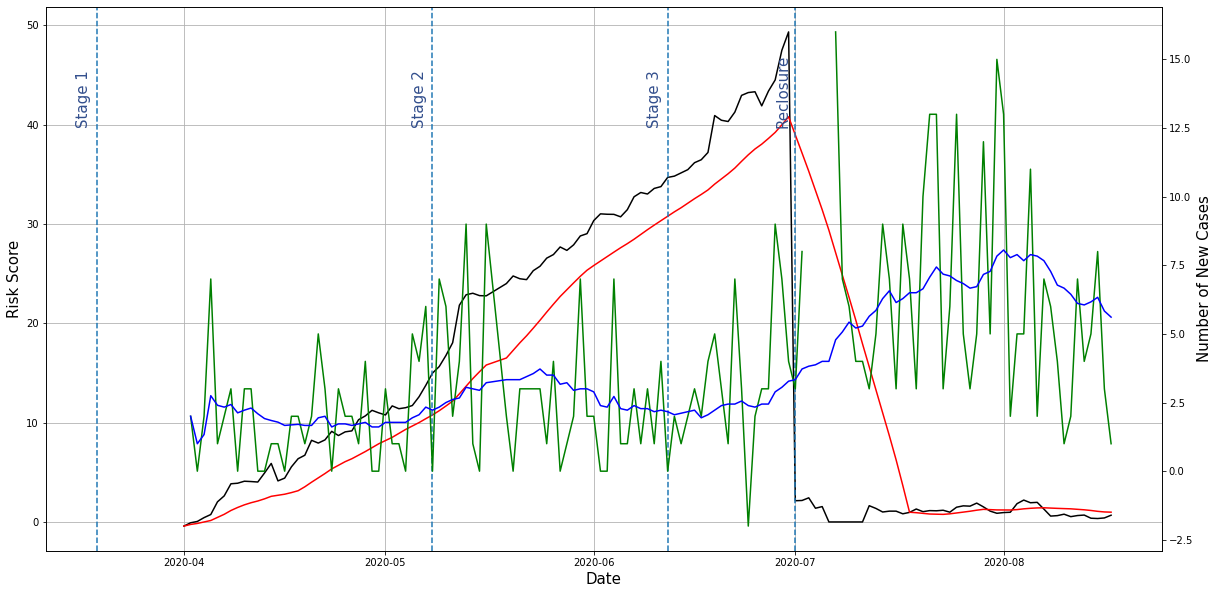

In [162]:
plot_trend(df,'Altadena')